In [1]:
# python notebook for Make Your Own Neural Network
# code for a 3-layer neural network, and code for learning the MNIST dataset

In [2]:
import numpy as np
# scipy.special for the sigmoid function expit()
import scipy.special
# library for plotting arrays
import matplotlib.pyplot
# ensure the plots are inside this notebook, not an external window
%matplotlib inline

In [3]:
# neural network class definition
class neuralNetwork:
    
    # initialise the neural network
    def __init__(self, inputnodes, hiddennodes, outputnodes, learningrate):
        # set number of nodes in each input, hidden, output layer
        self.inodes = inputnodes
        self.hnodes = hiddennodes
        self.onodes = outputnodes
        
        # learning rate
        self.lr = learningrate
        
        # link weight matrices, wih and who
        # weights inside the arrays are w_i_j, where link is from node i to node j in the next layer
        # w11 w21
        # w12 w22 etc
        self.wih = np.random.normal(0.0, pow(self.hnodes, -0.5), (self.hnodes, self.inodes))
        self.who = np.random.normal(0.0, pow(self.onodes, -0.5), (self.onodes, self.hnodes))
        
        # activation function is the sigmoid function 
        self.activation_function = lambda x: scipy.special.expit(x)
        
        pass
    
    # train the neural network
    def train(self, inputs_list, targets_list):
        # convert inputs list to 2d array
        inputs = np.array(inputs_list, ndmin=2).T
        targets = np.array(targets_list, ndmin=2).T
        
        # calculate signals into hidden layer
        hidden_inputs = np.dot(self.wih, inputs)
        # calculate the signals emerging from hidden layer
        hidden_outputs = self.activation_function(hidden_inputs)
        
        # calculate signals into final output layer
        final_inputs = np.dot(self.who, hidden_outputs)
        # calculate the signals emerging from final output layer
        final_outputs = self.activation_function(final_inputs)
        
        # output layer error is the (target - actual)
        output_errors = targets - final_outputs
        # hidden layer error is the output_errors, split by weights, recombined at hidden nodes
        hidden_errors = np.dot(self.who.T, output_errors)
        
        # update the weights for the links between the hidden and output layers
        self.who += self.lr * np.dot((output_errors * final_outputs * (1.0 - final_outputs)), np.transpose(hidden_outputs))
        # update the weights for the links between the input and hidden layers
        self.wih += self.lr * np.dot((hidden_errors * hidden_outputs * (1.0 - hidden_outputs)), np.transpose(inputs))
        
        pass
    
    # query the neural network
    def query(self, inputs_list):
        # convert inputs list to 2d array
        inputs = np.array(inputs_list, ndmin=2).T
        
        # calculate signals into hidden layer
        hidden_inputs = np.dot(self.wih, inputs)
        # calculate the signals emerging from hidden layer
        hidden_outputs = self.activation_function(hidden_inputs)
        
        # calculate signals into final output layer
        final_inputs = np.dot(self.who, hidden_outputs)
        # calculate the signals emerging from final output layer
        final_outputs = self.activation_function(final_inputs)

        return final_outputs
    
    pass


In [4]:
# number of input, hidden and output nodes
input_nodes = 784
hidden_nodes = 100
output_nodes = 10
# learning rate is 0.3
learning_rate = 0.3
# create instance of neural network
n = neuralNetwork(input_nodes, hidden_nodes, output_nodes, learning_rate)

In [5]:
# load the mnist training datat CSV file into a list
training_data_file = open('mnist_dataset/mnist_train.csv','r')
training_data_list = training_data_file.readlines()
training_data_file.close()

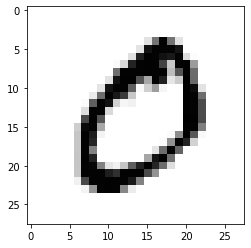

In [6]:
# data visualization
all_values = training_data_list[1].split(',')
image_array = np.asfarray(all_values[1:]).reshape((28,28))
matplotlib.pyplot.imshow(image_array, cmap='Greys', interpolation='None')

In [7]:
# train the neural network

# epochs is the number of times the training data set is used for training
epochs = 2

for e in range(epochs):
    # go through all records in the training data set
    for record in training_data_list:
        # split the record by the ',' commas
        all_values = record.split(',')
        # scale and shift the inputs
        inputs = (np.asfarray(all_values[1:]) / 255.0 * 0.99) + 0.01
        # create the target output values (all 0.01, except the desired label which is 0.99)
        targets = np.zeros(output_nodes) + 0.01
        # all_values[0] is the target label for this record
        targets[int(all_values[0])] = 0.99
        n.train(inputs, targets)
        pass
    pass

In [8]:
# load the mnist test data CSV file into a list
test_data_file = open('mnist_dataset/mnist_test.csv','r')
test_data_list = test_data_file.readlines()
test_data_file.close()


In [9]:
# get the first test record
all_values = test_data_list[0].split(',')
# print the label
print(all_values[0])

7


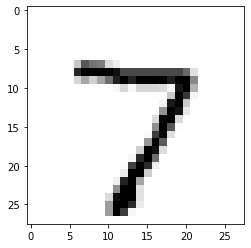

In [10]:
image_array = np.asfarray(all_values[1:]).reshape((28,28))
matplotlib.pyplot.imshow(image_array, cmap='Greys', interpolation='None')

In [11]:
n.query((np.asfarray(all_values[1:]) / 255.0 * 0.99) + 0.01)

array([[8.70308893e-04],
       [3.19057240e-03],
       [1.43545274e-02],
       [4.57749783e-03],
       [8.51781628e-03],
       [4.97875674e-03],
       [1.28644916e-03],
       [9.87877600e-01],
       [2.58252784e-03],
       [1.68077840e-03]])

In [12]:
# test the neural network

# scorecard for how well the network performs, initially empty
scorecard = []

# go through all the records in the test data set
for record in test_data_list:
    # split the record the ',' commas
    all_values = record.split(',')
    # correct answer is first value
    correct_label = (int)(all_values[0])
    print(correct_label, "correct label")
    # scale and shift the inputs
    inputs = (np.asfarray(all_values[1:]) / 255.0 * 0.99) + 0.01
    # query the network
    outputs = n.query(inputs)
    # the index of the highest value corresponds to the label
    label = np.argmax(outputs)
    print(label, "network's answer")
    # append correct or incorrect to list
    if(label == correct_label):
        # network's answer matches correct answer, add 1 to scorecard
        scorecard.append(1)
    else:
        # network's answer doesn't match correct answer, add 0 to scorecard
        scorecard.append(0)
        pass
    pass

7 correct label
7 network's answer
2 correct label
2 network's answer
1 correct label
1 network's answer
0 correct label
0 network's answer
4 correct label
4 network's answer
1 correct label
1 network's answer
4 correct label
4 network's answer
9 correct label
9 network's answer
5 correct label
6 network's answer
9 correct label
9 network's answer
0 correct label
0 network's answer
6 correct label
6 network's answer
9 correct label
9 network's answer
0 correct label
0 network's answer
1 correct label
1 network's answer
5 correct label
5 network's answer
9 correct label
9 network's answer
7 correct label
7 network's answer
3 correct label
3 network's answer
4 correct label
4 network's answer
9 correct label
9 network's answer
6 correct label
6 network's answer
6 correct label
6 network's answer
5 correct label
5 network's answer
4 correct label
4 network's answer
0 correct label
0 network's answer
7 correct label
7 network's answer
4 correct label
4 network's answer
0 correct label
0 ne

8 correct label
8 network's answer
8 correct label
8 network's answer
5 correct label
5 network's answer
4 correct label
4 network's answer
1 correct label
1 network's answer
1 correct label
1 network's answer
4 correct label
4 network's answer
0 correct label
0 network's answer
3 correct label
7 network's answer
3 correct label
3 network's answer
7 correct label
7 network's answer
6 correct label
6 network's answer
1 correct label
1 network's answer
6 correct label
6 network's answer
2 correct label
2 network's answer
1 correct label
1 network's answer
9 correct label
9 network's answer
2 correct label
2 network's answer
8 correct label
8 network's answer
6 correct label
6 network's answer
1 correct label
1 network's answer
9 correct label
9 network's answer
5 correct label
5 network's answer
2 correct label
2 network's answer
5 correct label
5 network's answer
4 correct label
4 network's answer
4 correct label
4 network's answer
2 correct label
2 network's answer
8 correct label
8 ne

7 network's answer
1 correct label
1 network's answer
2 correct label
2 network's answer
5 correct label
5 network's answer
8 correct label
8 network's answer
0 correct label
0 network's answer
3 correct label
3 network's answer
7 correct label
4 network's answer
2 correct label
9 network's answer
4 correct label
4 network's answer
0 correct label
0 network's answer
9 correct label
9 network's answer
1 correct label
1 network's answer
8 correct label
8 network's answer
6 correct label
6 network's answer
7 correct label
7 network's answer
7 correct label
7 network's answer
4 correct label
4 network's answer
3 correct label
3 network's answer
4 correct label
4 network's answer
9 correct label
9 network's answer
1 correct label
1 network's answer
9 correct label
9 network's answer
5 correct label
5 network's answer
1 correct label
1 network's answer
7 correct label
7 network's answer
3 correct label
3 network's answer
9 correct label
9 network's answer
7 correct label
7 network's answer
6

3 network's answer
9 correct label
9 network's answer
0 correct label
0 network's answer
1 correct label
1 network's answer
2 correct label
2 network's answer
2 correct label
2 network's answer
0 correct label
0 network's answer
8 correct label
8 network's answer
9 correct label
9 network's answer
9 correct label
9 network's answer
0 correct label
0 network's answer
2 correct label
2 network's answer
5 correct label
5 network's answer
1 correct label
1 network's answer
9 correct label
9 network's answer
7 correct label
7 network's answer
8 correct label
8 network's answer
1 correct label
1 network's answer
0 correct label
0 network's answer
4 correct label
4 network's answer
1 correct label
1 network's answer
7 correct label
7 network's answer
9 correct label
9 network's answer
6 correct label
5 network's answer
4 correct label
4 network's answer
2 correct label
2 network's answer
6 correct label
6 network's answer
8 correct label
8 network's answer
1 correct label
1 network's answer
3

1 network's answer
5 correct label
5 network's answer
5 correct label
5 network's answer
2 correct label
2 network's answer
4 correct label
4 network's answer
9 correct label
9 network's answer
6 correct label
6 network's answer
2 correct label
2 network's answer
7 correct label
7 network's answer
7 correct label
9 network's answer
2 correct label
2 network's answer
2 correct label
2 network's answer
1 correct label
1 network's answer
1 correct label
1 network's answer
2 correct label
2 network's answer
8 correct label
8 network's answer
3 correct label
3 network's answer
7 correct label
7 network's answer
2 correct label
2 network's answer
4 correct label
4 network's answer
1 correct label
1 network's answer
7 correct label
7 network's answer
1 correct label
1 network's answer
7 correct label
7 network's answer
6 correct label
6 network's answer
7 correct label
7 network's answer
8 correct label
8 network's answer
2 correct label
2 network's answer
7 correct label
7 network's answer
3

6 network's answer
0 correct label
0 network's answer
3 correct label
3 network's answer
1 correct label
1 network's answer
1 correct label
1 network's answer
3 correct label
5 network's answer
3 correct label
3 network's answer
9 correct label
9 network's answer
6 correct label
6 network's answer
7 correct label
7 network's answer
4 correct label
4 network's answer
1 correct label
1 network's answer
5 correct label
5 network's answer
3 correct label
3 network's answer
0 correct label
0 network's answer
8 correct label
8 network's answer
7 correct label
7 network's answer
3 correct label
3 network's answer
9 correct label
9 network's answer
6 correct label
6 network's answer
9 correct label
9 network's answer
3 correct label
3 network's answer
5 correct label
5 network's answer
0 correct label
0 network's answer
2 correct label
2 network's answer
7 correct label
7 network's answer
4 correct label
2 network's answer
5 correct label
5 network's answer
1 correct label
1 network's answer
7

9 network's answer
3 correct label
3 network's answer
7 correct label
4 network's answer
1 correct label
1 network's answer
3 correct label
3 network's answer
5 correct label
5 network's answer
4 correct label
4 network's answer
3 correct label
3 network's answer
3 correct label
3 network's answer
5 correct label
5 network's answer
5 correct label
5 network's answer
6 correct label
6 network's answer
3 correct label
3 network's answer
0 correct label
0 network's answer
2 correct label
2 network's answer
3 correct label
3 network's answer
4 correct label
4 network's answer
2 correct label
2 network's answer
3 correct label
3 network's answer
0 correct label
0 network's answer
9 correct label
9 network's answer
9 correct label
9 network's answer
4 correct label
4 network's answer
7 correct label
7 network's answer
2 correct label
2 network's answer
8 correct label
1 network's answer
4 correct label
9 network's answer
7 correct label
7 network's answer
0 correct label
0 network's answer
6

2 network's answer
8 correct label
8 network's answer
3 correct label
3 network's answer
2 correct label
2 network's answer
2 correct label
2 network's answer
1 correct label
1 network's answer
0 correct label
0 network's answer
4 correct label
4 network's answer
2 correct label
2 network's answer
9 correct label
9 network's answer
2 correct label
2 network's answer
4 correct label
4 network's answer
3 correct label
3 network's answer
7 correct label
7 network's answer
9 correct label
9 network's answer
1 correct label
1 network's answer
5 correct label
5 network's answer
2 correct label
2 network's answer
4 correct label
9 network's answer
9 correct label
9 network's answer
0 correct label
0 network's answer
3 correct label
3 network's answer
8 correct label
8 network's answer
5 correct label
5 network's answer
3 correct label
3 network's answer
6 correct label
6 network's answer
0 correct label
0 network's answer
9 correct label
9 network's answer
4 correct label
4 network's answer
6

5 network's answer
3 correct label
3 network's answer
8 correct label
8 network's answer
6 correct label
6 network's answer
2 correct label
2 network's answer
1 correct label
1 network's answer
4 correct label
4 network's answer
5 correct label
5 network's answer
4 correct label
4 network's answer
3 correct label
3 network's answer
7 correct label
7 network's answer
8 correct label
8 network's answer
5 correct label
5 network's answer
0 correct label
0 network's answer
9 correct label
9 network's answer
3 correct label
3 network's answer
5 correct label
5 network's answer
1 correct label
1 network's answer
1 correct label
1 network's answer
0 correct label
0 network's answer
4 correct label
4 network's answer
4 correct label
4 network's answer
7 correct label
7 network's answer
0 correct label
0 network's answer
1 correct label
1 network's answer
7 correct label
7 network's answer
0 correct label
0 network's answer
1 correct label
1 network's answer
6 correct label
6 network's answer
1

5 network's answer
2 correct label
2 network's answer
3 correct label
3 network's answer
6 correct label
6 network's answer
3 correct label
3 network's answer
1 correct label
2 network's answer
4 correct label
4 network's answer
2 correct label
2 network's answer
6 correct label
6 network's answer
7 correct label
9 network's answer
4 correct label
4 network's answer
3 correct label
3 network's answer
8 correct label
8 network's answer
0 correct label
0 network's answer
6 correct label
6 network's answer
2 correct label
2 network's answer
1 correct label
1 network's answer
6 correct label
6 network's answer
5 correct label
9 network's answer
3 correct label
3 network's answer
9 correct label
9 network's answer
1 correct label
1 network's answer
9 correct label
9 network's answer
3 correct label
3 network's answer
2 correct label
2 network's answer
1 correct label
1 network's answer
8 correct label
8 network's answer
4 correct label
4 network's answer
4 correct label
4 network's answer
6

8 network's answer
6 correct label
4 network's answer
8 correct label
8 network's answer
2 correct label
2 network's answer
4 correct label
4 network's answer
6 correct label
6 network's answer
7 correct label
7 network's answer
9 correct label
9 network's answer
3 correct label
3 network's answer
3 correct label
3 network's answer
9 correct label
9 network's answer
4 correct label
4 network's answer
3 correct label
3 network's answer
1 correct label
1 network's answer
4 correct label
4 network's answer
4 correct label
4 network's answer
7 correct label
7 network's answer
0 correct label
0 network's answer
5 correct label
5 network's answer
9 correct label
9 network's answer
6 correct label
6 network's answer
0 correct label
0 network's answer
4 correct label
4 network's answer
4 correct label
4 network's answer
4 correct label
4 network's answer
4 correct label
4 network's answer
6 correct label
6 network's answer
1 correct label
1 network's answer
2 correct label
2 network's answer
3

4 network's answer
2 correct label
2 network's answer
5 correct label
5 network's answer
7 correct label
7 network's answer
9 correct label
9 network's answer
8 correct label
8 network's answer
9 correct label
9 network's answer
8 correct label
8 network's answer
0 correct label
0 network's answer
9 correct label
9 network's answer
9 correct label
9 network's answer
6 correct label
6 network's answer
8 correct label
8 network's answer
9 correct label
9 network's answer
9 correct label
9 network's answer
5 correct label
5 network's answer
9 correct label
9 network's answer
8 correct label
8 network's answer
5 correct label
5 network's answer
1 correct label
1 network's answer
0 correct label
0 network's answer
3 correct label
3 network's answer
3 correct label
3 network's answer
5 correct label
5 network's answer
2 correct label
2 network's answer
1 correct label
1 network's answer
6 correct label
6 network's answer
5 correct label
3 network's answer
0 correct label
0 network's answer
2

5 correct label
5 network's answer
9 correct label
9 network's answer
7 correct label
7 network's answer
6 correct label
6 network's answer
9 correct label
9 network's answer
0 correct label
0 network's answer
3 correct label
3 network's answer
6 correct label
6 network's answer
3 correct label
3 network's answer
9 correct label
9 network's answer
8 correct label
8 network's answer
2 correct label
2 network's answer
2 correct label
8 network's answer
1 correct label
1 network's answer
2 correct label
2 network's answer
8 correct label
8 network's answer
6 correct label
6 network's answer
8 correct label
8 network's answer
5 correct label
5 network's answer
5 correct label
5 network's answer
3 correct label
0 network's answer
9 correct label
9 network's answer
4 correct label
4 network's answer
9 correct label
9 network's answer
2 correct label
2 network's answer
5 correct label
5 network's answer
1 correct label
1 network's answer
5 correct label
5 network's answer
1 correct label
1 ne

6 network's answer
1 correct label
1 network's answer
3 correct label
3 network's answer
2 correct label
2 network's answer
5 correct label
5 network's answer
9 correct label
9 network's answer
9 correct label
9 network's answer
3 correct label
3 network's answer
6 correct label
6 network's answer
1 correct label
1 network's answer
1 correct label
1 network's answer
4 correct label
4 network's answer
6 correct label
6 network's answer
9 correct label
9 network's answer
7 correct label
7 network's answer
2 correct label
2 network's answer
1 correct label
1 network's answer
5 correct label
5 network's answer
1 correct label
1 network's answer
4 correct label
4 network's answer
6 correct label
6 network's answer
3 correct label
3 network's answer
8 correct label
4 network's answer
1 correct label
1 network's answer
1 correct label
1 network's answer
0 correct label
0 network's answer
3 correct label
3 network's answer
1 correct label
1 network's answer
6 correct label
6 network's answer
8

2 network's answer
2 correct label
2 network's answer
7 correct label
1 network's answer
9 correct label
9 network's answer
9 correct label
9 network's answer
2 correct label
2 network's answer
7 correct label
7 network's answer
5 correct label
5 network's answer
1 correct label
1 network's answer
3 correct label
3 network's answer
4 correct label
4 network's answer
9 correct label
9 network's answer
4 correct label
9 network's answer
1 correct label
1 network's answer
8 correct label
9 network's answer
5 correct label
5 network's answer
6 correct label
6 network's answer
2 correct label
2 network's answer
8 correct label
8 network's answer
3 correct label
3 network's answer
1 correct label
1 network's answer
2 correct label
2 network's answer
8 correct label
8 network's answer
4 correct label
4 network's answer
9 correct label
9 network's answer
9 correct label
9 network's answer
3 correct label
2 network's answer
7 correct label
7 network's answer
0 correct label
0 network's answer
7

1 network's answer
3 correct label
3 network's answer
3 correct label
3 network's answer
3 correct label
3 network's answer
1 correct label
6 network's answer
6 correct label
6 network's answer
9 correct label
9 network's answer
7 correct label
7 network's answer
4 correct label
4 network's answer
3 correct label
3 network's answer
0 correct label
0 network's answer
2 correct label
2 network's answer
5 correct label
5 network's answer
2 correct label
2 network's answer
6 correct label
6 network's answer
0 correct label
0 network's answer
8 correct label
8 network's answer
9 correct label
9 network's answer
4 correct label
4 network's answer
3 correct label
3 network's answer
5 correct label
5 network's answer
4 correct label
4 network's answer
8 correct label
8 network's answer
1 correct label
1 network's answer
5 correct label
5 network's answer
9 correct label
9 network's answer
0 correct label
0 network's answer
6 correct label
6 network's answer
4 correct label
4 network's answer
3

1 network's answer
6 correct label
6 network's answer
4 correct label
4 network's answer
2 correct label
2 network's answer
6 correct label
6 network's answer
6 correct label
6 network's answer
0 correct label
0 network's answer
4 correct label
4 network's answer
5 correct label
5 network's answer
4 correct label
4 network's answer
1 correct label
1 network's answer
3 correct label
3 network's answer
8 correct label
8 network's answer
6 correct label
6 network's answer
3 correct label
3 network's answer
9 correct label
9 network's answer
9 correct label
9 network's answer
5 correct label
5 network's answer
9 correct label
9 network's answer
3 correct label
3 network's answer
7 correct label
7 network's answer
8 correct label
8 network's answer
5 correct label
5 network's answer
6 correct label
6 network's answer
4 correct label
4 network's answer
7 correct label
9 network's answer
6 correct label
6 network's answer
2 correct label
2 network's answer
2 correct label
2 network's answer
0

3 network's answer
2 correct label
0 network's answer
2 correct label
2 network's answer
4 correct label
4 network's answer
6 correct label
6 network's answer
9 correct label
9 network's answer
0 correct label
0 network's answer
2 correct label
2 network's answer
5 correct label
5 network's answer
5 correct label
5 network's answer
1 correct label
1 network's answer
3 correct label
9 network's answer
3 correct label
3 network's answer
9 correct label
9 network's answer
7 correct label
7 network's answer
8 correct label
8 network's answer
7 correct label
7 network's answer
2 correct label
2 network's answer
2 correct label
2 network's answer
5 correct label
9 network's answer
7 correct label
7 network's answer
9 correct label
9 network's answer
8 correct label
8 network's answer
2 correct label
2 network's answer
1 correct label
1 network's answer
3 correct label
9 network's answer
1 correct label
1 network's answer
3 correct label
3 network's answer
0 correct label
0 network's answer
1

0 network's answer
6 correct label
6 network's answer
0 correct label
0 network's answer
9 correct label
9 network's answer
6 correct label
6 network's answer
8 correct label
8 network's answer
8 correct label
8 network's answer
5 correct label
5 network's answer
6 correct label
6 network's answer
1 correct label
1 network's answer
1 correct label
1 network's answer
9 correct label
9 network's answer
8 correct label
8 network's answer
9 correct label
9 network's answer
2 correct label
2 network's answer
3 correct label
3 network's answer
5 correct label
5 network's answer
5 correct label
5 network's answer
9 correct label
9 network's answer
4 correct label
4 network's answer
2 correct label
2 network's answer
1 correct label
1 network's answer
9 correct label
9 network's answer
3 correct label
3 network's answer
9 correct label
9 network's answer
2 correct label
2 network's answer
0 correct label
0 network's answer
6 correct label
6 network's answer
0 correct label
0 network's answer
4

1 network's answer
1 correct label
1 network's answer
4 correct label
4 network's answer
0 correct label
0 network's answer
4 correct label
4 network's answer
7 correct label
7 network's answer
3 correct label
3 network's answer
6 correct label
6 network's answer
8 correct label
8 network's answer
0 correct label
0 network's answer
3 correct label
3 network's answer
7 correct label
7 network's answer
4 correct label
4 network's answer
0 correct label
0 network's answer
6 correct label
6 network's answer
9 correct label
9 network's answer
2 correct label
2 network's answer
6 correct label
6 network's answer
5 correct label
5 network's answer
8 correct label
8 network's answer
6 correct label
6 network's answer
9 correct label
9 network's answer
0 correct label
0 network's answer
4 correct label
4 network's answer
0 correct label
0 network's answer
6 correct label
6 network's answer
1 correct label
6 network's answer
9 correct label
9 network's answer
2 correct label
2 network's answer
0

2 network's answer
8 correct label
8 network's answer
6 correct label
6 network's answer
1 correct label
1 network's answer
7 correct label
7 network's answer
4 correct label
4 network's answer
8 correct label
8 network's answer
8 correct label
8 network's answer
9 correct label
9 network's answer
0 correct label
0 network's answer
3 correct label
3 network's answer
3 correct label
3 network's answer
9 correct label
9 network's answer
0 correct label
0 network's answer
5 correct label
5 network's answer
2 correct label
2 network's answer
9 correct label
9 network's answer
4 correct label
4 network's answer
1 correct label
1 network's answer
0 correct label
0 network's answer
3 correct label
3 network's answer
7 correct label
7 network's answer
5 correct label
5 network's answer
8 correct label
8 network's answer
7 correct label
7 network's answer
7 correct label
7 network's answer
8 correct label
8 network's answer
2 correct label
2 network's answer
9 correct label
9 network's answer
7

8 network's answer
4 correct label
4 network's answer
2 correct label
2 network's answer
3 correct label
3 network's answer
9 correct label
9 network's answer
7 correct label
7 network's answer
6 correct label
6 network's answer
9 correct label
9 network's answer
1 correct label
1 network's answer
9 correct label
9 network's answer
0 correct label
0 network's answer
6 correct label
6 network's answer
7 correct label
7 network's answer
1 correct label
1 network's answer
2 correct label
2 network's answer
3 correct label
3 network's answer
9 correct label
9 network's answer
2 correct label
2 network's answer
4 correct label
4 network's answer
5 correct label
5 network's answer
5 correct label
5 network's answer
3 correct label
3 network's answer
7 correct label
7 network's answer
5 correct label
5 network's answer
3 correct label
3 network's answer
1 correct label
1 network's answer
8 correct label
8 network's answer
2 correct label
2 network's answer
2 correct label
2 network's answer
3

0 network's answer
1 correct label
1 network's answer
2 correct label
2 network's answer
3 correct label
7 network's answer
5 correct label
8 network's answer
6 correct label
0 network's answer
7 correct label
7 network's answer
8 correct label
8 network's answer
9 correct label
9 network's answer
0 correct label
0 network's answer
1 correct label
1 network's answer
2 correct label
2 network's answer
3 correct label
2 network's answer
5 correct label
5 network's answer
6 correct label
0 network's answer
7 correct label
7 network's answer
8 correct label
8 network's answer
9 correct label
9 network's answer
9 correct label
9 network's answer
7 correct label
7 network's answer
0 correct label
0 network's answer
9 correct label
9 network's answer
0 correct label
0 network's answer
1 correct label
1 network's answer
5 correct label
5 network's answer
8 correct label
8 network's answer
8 correct label
8 network's answer
0 correct label
0 network's answer
9 correct label
9 network's answer
3

2 network's answer
8 correct label
8 network's answer
9 correct label
9 network's answer
6 correct label
6 network's answer
0 correct label
0 network's answer
9 correct label
9 network's answer
5 correct label
5 network's answer
3 correct label
3 network's answer
8 correct label
8 network's answer
8 correct label
8 network's answer
7 correct label
7 network's answer
1 correct label
1 network's answer
4 correct label
4 network's answer
0 correct label
0 network's answer
4 correct label
4 network's answer
8 correct label
8 network's answer
5 correct label
5 network's answer
2 correct label
2 network's answer
3 correct label
3 network's answer
9 correct label
9 network's answer
0 correct label
0 network's answer
1 correct label
1 network's answer
9 correct label
9 network's answer
1 correct label
1 network's answer
5 correct label
5 network's answer
1 correct label
1 network's answer
7 correct label
7 network's answer
4 correct label
4 network's answer
8 correct label
8 network's answer
6

0 network's answer
1 correct label
1 network's answer
2 correct label
2 network's answer
3 correct label
3 network's answer
4 correct label
4 network's answer
5 correct label
5 network's answer
6 correct label
6 network's answer
7 correct label
7 network's answer
8 correct label
8 network's answer
0 correct label
0 network's answer
1 correct label
1 network's answer
2 correct label
2 network's answer
3 correct label
3 network's answer
5 correct label
5 network's answer
6 correct label
6 network's answer
7 correct label
7 network's answer
8 correct label
8 network's answer
1 correct label
1 network's answer
0 correct label
0 network's answer
4 correct label
4 network's answer
5 correct label
5 network's answer
6 correct label
6 network's answer
6 correct label
6 network's answer
3 correct label
3 network's answer
4 correct label
4 network's answer
4 correct label
4 network's answer
2 correct label
2 network's answer
8 correct label
8 network's answer
1 correct label
1 network's answer
0

6 network's answer
2 correct label
2 network's answer
6 correct label
6 network's answer
7 correct label
7 network's answer
1 correct label
1 network's answer
9 correct label
9 network's answer
8 correct label
8 network's answer
0 correct label
0 network's answer
6 correct label
6 network's answer
9 correct label
9 network's answer
4 correct label
4 network's answer
9 correct label
9 network's answer
9 correct label
9 network's answer
6 correct label
6 network's answer
2 correct label
2 network's answer
3 correct label
3 network's answer
7 correct label
7 network's answer
1 correct label
1 network's answer
9 correct label
9 network's answer
2 correct label
2 network's answer
2 correct label
2 network's answer
5 correct label
5 network's answer
3 correct label
3 network's answer
7 correct label
7 network's answer
8 correct label
8 network's answer
0 correct label
0 network's answer
1 correct label
1 network's answer
2 correct label
2 network's answer
3 correct label
3 network's answer
4

9 network's answer
0 correct label
0 network's answer
1 correct label
1 network's answer
3 correct label
3 network's answer
4 correct label
4 network's answer
5 correct label
5 network's answer
6 correct label
6 network's answer
7 correct label
7 network's answer
8 correct label
5 network's answer
0 correct label
0 network's answer
1 correct label
1 network's answer
3 correct label
3 network's answer
4 correct label
4 network's answer
7 correct label
7 network's answer
8 correct label
8 network's answer
9 correct label
9 network's answer
7 correct label
7 network's answer
5 correct label
5 network's answer
5 correct label
5 network's answer
1 correct label
1 network's answer
9 correct label
9 network's answer
9 correct label
9 network's answer
7 correct label
7 network's answer
1 correct label
1 network's answer
0 correct label
0 network's answer
0 correct label
0 network's answer
5 correct label
5 network's answer
9 correct label
9 network's answer
7 correct label
7 network's answer
1

8 network's answer
8 correct label
8 network's answer
0 correct label
0 network's answer
6 correct label
6 network's answer
0 correct label
0 network's answer
0 correct label
8 network's answer
2 correct label
2 network's answer
3 correct label
3 network's answer
7 correct label
7 network's answer
9 correct label
9 network's answer
4 correct label
4 network's answer
7 correct label
7 network's answer
1 correct label
1 network's answer
9 correct label
9 network's answer
1 correct label
1 network's answer
7 correct label
7 network's answer
1 correct label
1 network's answer
4 correct label
4 network's answer
0 correct label
0 network's answer
0 correct label
0 network's answer
1 correct label
1 network's answer
7 correct label
7 network's answer
5 correct label
5 network's answer
7 correct label
7 network's answer
1 correct label
1 network's answer
3 correct label
3 network's answer
3 correct label
3 network's answer
3 correct label
3 network's answer
1 correct label
1 network's answer
6

6 network's answer
4 correct label
4 network's answer
1 correct label
1 network's answer
7 correct label
7 network's answer
2 correct label
3 network's answer
6 correct label
6 network's answer
5 correct label
6 network's answer
0 correct label
0 network's answer
1 correct label
1 network's answer
2 correct label
2 network's answer
3 correct label
3 network's answer
4 correct label
4 network's answer
5 correct label
5 network's answer
6 correct label
6 network's answer
7 correct label
7 network's answer
8 correct label
8 network's answer
9 correct label
9 network's answer
0 correct label
0 network's answer
1 correct label
1 network's answer
2 correct label
2 network's answer
3 correct label
3 network's answer
4 correct label
4 network's answer
5 correct label
5 network's answer
6 correct label
6 network's answer


In [13]:
print(scorecard)

[1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 

In [14]:
# calculate the performance score, the fraction of correct answers
scorecard_array = np.asarray(scorecard)
print("performance = ", scorecard_array.sum() / scorecard_array.size)

performance =  0.9504
